In [1]:
import numpy as np

## Задача 1

Совместное распределение $(X, Y, Z)$ задается таблицей:

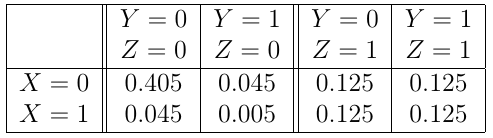

Зададим трехмерную матрицу вероятностей

In [2]:
probs = np.array([
    [[0.405, 0.045], [0.125, 0.125]],
    [[0.045, 0.005], [0.125, 0.125]]
])

На самом деле получилось распределение вектора $(X, Z, Y)$

In [3]:
probs

array([[[0.405, 0.045],
        [0.125, 0.125]],

       [[0.045, 0.005],
        [0.125, 0.125]]])

Вероятности при $Z=0$

In [6]:
probs[:, 0, :]

array([[0.405, 0.045],
       [0.045, 0.005]])

### 1. Безусловная независимость

Распределение $(X, Y)$

In [5]:
probs.sum(axis=1)

array([[0.53, 0.17],
       [0.17, 0.13]])

Распределение $X$

In [7]:
probs.sum(axis=(1, 2))

array([0.7, 0.3])

Распределение $Y$

In [8]:
probs.sum(axis=(0, 1))

array([0.7, 0.3])

Теперь видно, что
$\mathsf{P}(X=0, Y=0) = 0.53 \not= 0.7 \cdot 0.7 = \mathsf{P}(X=0)\mathsf{P}(Y=0)$. Таким образом, случайные величины $X$ и $Y$ **зависимы**.

### 2. Условная независимость

Покажем, что $\mathsf{P}(X=x, Y=y \:|\: Z = z) = \mathsf{P}(X=x\:|\: Z = z)\:\mathsf{P}(Y=y\:|\: Z = z)$ для всех $x, y, z$.

Вспомним формулы 
* $\mathsf{P}(X=x, Y=y \:|\: Z = z) = \frac{\mathsf{P}(X=x, Y=y, Z = z)}{\mathsf{P}(Z = z)}$
* $\mathsf{P}(X=x \:|\: Z = z) = \frac{\mathsf{P}(X=x, Z = z)}{\mathsf{P}(Z = z)}$

Посчитаем распределения векторов $(X, Z)$ и $(Y, Z)$

In [9]:
probs_XZ = probs.sum(axis=2)
probs_XZ

array([[0.45, 0.25],
       [0.05, 0.25]])

In [10]:
probs_YZ = probs.sum(axis=0).T
probs_YZ

array([[0.45, 0.25],
       [0.05, 0.25]])

А также распределение $Z$

In [11]:
probs_Z = probs.sum(axis=(0, 2))
probs_Z

array([0.5, 0.5])

Проверим равенство для всех $x, y, z$

In [14]:
for x in [0, 1]:
    for y in [0, 1]:
        for z in [0, 1]:
            print('P(X={}, Y={} | Z={}) = '.format(x, y, z), end='')
            print(probs[x, z, y] / probs_Z[z])
            print('P(X={} | Z={}) * P(Y={} | Z={}) = '.format(x, z, y, z), end='')
            print(probs_XZ[x, z] / probs_Z[z] * probs_YZ[y, z] / probs_Z[z])
            print()

P(X=0, Y=0 | Z=0) = 0.81
P(X=0 | Z=0) * P(Y=0 | Z=0) = 0.81

P(X=0, Y=0 | Z=1) = 0.25
P(X=0 | Z=1) * P(Y=0 | Z=1) = 0.25

P(X=0, Y=1 | Z=0) = 0.09
P(X=0 | Z=0) * P(Y=1 | Z=0) = 0.09

P(X=0, Y=1 | Z=1) = 0.25
P(X=0 | Z=1) * P(Y=1 | Z=1) = 0.25

P(X=1, Y=0 | Z=0) = 0.09
P(X=1 | Z=0) * P(Y=0 | Z=0) = 0.09

P(X=1, Y=0 | Z=1) = 0.25
P(X=1 | Z=1) * P(Y=0 | Z=1) = 0.25

P(X=1, Y=1 | Z=0) = 0.01
P(X=1 | Z=0) * P(Y=1 | Z=0) = 0.009999999999999998

P(X=1, Y=1 | Z=1) = 0.25
P(X=1 | Z=1) * P(Y=1 | Z=1) = 0.25



Все совпадает с точностью до компьютерной погрешности. Таким образом, случайные величины $X$ и $Y$ **условно независимы** по $Z$.